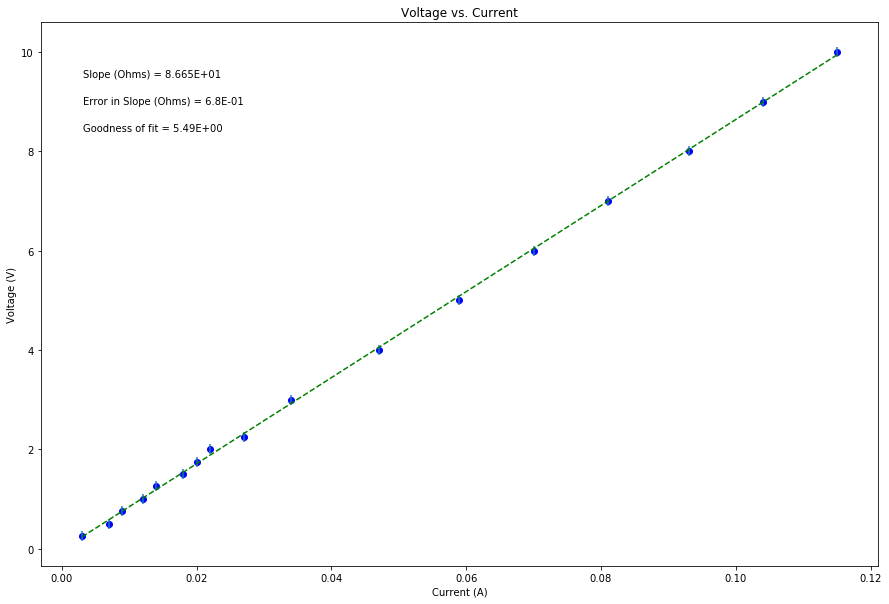

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

xvariable_changeme = np.array([0.003,0.007,0.009,0.012,0.014,0.018,0.02,0.022,0.027,0.034,0.047,0.059,0.07,0.081,0.093,0.104,0.115]) #what are units?
yvariable_changeme = np.array([0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,3,4,5,6,7,8,9,10]) #what are units?

err_yvariable_changeme = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

x = xvariable_changeme   #this should be the array you want to plot on the x axis
y = yvariable_changeme
dy = err_yvariable_changeme  #this should be your error in y array

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Current')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (Ohms) = {value:.{digits}E}'.format(value=m, digits=3),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
